# Introduction to pyAcceLEGOrator

15.10.2021

The (rough) UML class diagram is given below:

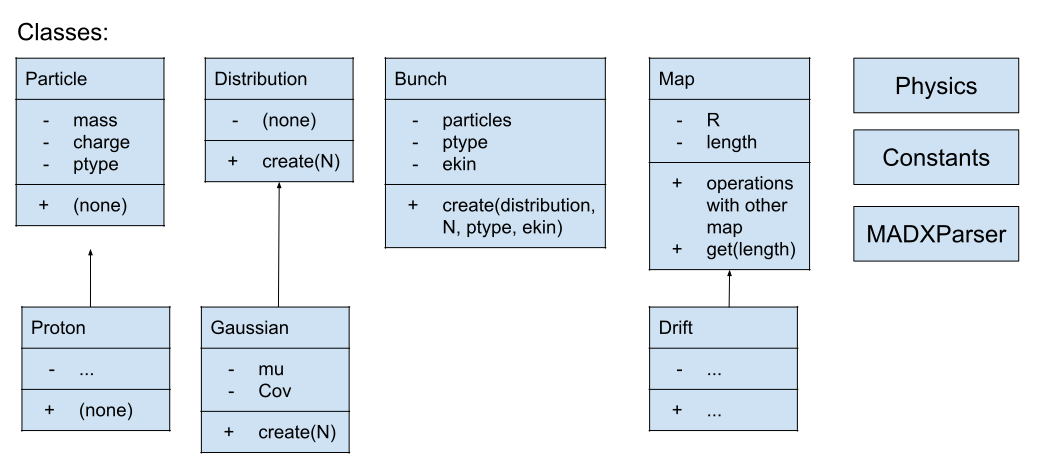

In [1]:
from IPython.core.display import SVG
SVG(filename='img/uml.svg')

# Example: Bunch Distribution

<html>
<div class="alert alert-info" role="alert" style="margin-top: 10px">
The goal of this example is to create a Gaussian bunch distribution with given correlation and mean. Plot the different phase spaces $(x, x'), (y, y')$ and $(z, z')$. Play with the covariance matrix and the mean.
</div>
</html>

In a first step we need to define a class that creates a Gaussian particle
distribution. A multivariate normal distribution takes two arguments. A mean $\mu\in\mathbb{R}^{6\times 1}$ specifying the centroid and a covariance matrix $C\in\mathbb{R}^{6\times 6}$ for the correlation and size. The state vector of a particle is defined by
$$\zeta =
\begin{pmatrix}
x & [mm] \\ px & [mrad] \\ y & [mm]\\ py & [mrad]\\ z & [mm]\\ pz & [{}^\text{o}\mkern-1mu/\mkern-1mu_\text{oo}]
\end{pmatrix}$$

All distributions should be derived from the abstract base class ```Distribution```. Every child class needs to implement the function ```create(N)``` where ```N``` specifies the number of particles.

```Python
class Distribution:
    """The abstract class of distribution

    Methods
    -------
    create(N)
        the abstract method of creating N particles
    __str__()
        construct a formatted string of the distribution information
    """

    def __init__(self):
        pass


    @abstractmethod
    def create(self, N):
        pass


    @abstractmethod
    def __str__(self):
        """Construct a formatted string of the distribution information

        Returns
        -------
        info
            a string of distribution information
        """

        sign = '*' * 51
        info = sign + '\n'\
               + 'Distribution information:\n' \
               + '         Empty Distribution\n'\
               + sign
        return info
```

For example, Gaussian is inherited from the Distribution class.
```python
class Gaussian(Distribution):
    """A class of Gaussian distribution

    Attributes
    ----------
    __mu : array of (6,)
        mean of Gaussian distribution of the 6-vectors
    __cov : array of (6, 6)
        covariance matrix of Gaussian distribution of the 6-vectors

    Methods
    -------
    create(N)
        create N particles following the Gaussian distribution
    __str__()
        construct a formatted string of the Gaussain distribution information
    """

    def __init__(self, mu, C):
        """Define the distribution parameters

        Parameters
        ----------
        mu : array of (6,)
            mean of Gaussian distribution of the 6-vectors
        C : array of (6, 6)
            covariance matrix of Gaussian distribution of the 6-vectors
        """

        super(Gaussian, self).__init__()
        self.__mu = mu
        self.__cov = C


    def create(self, N):
        """Create N particles following the Gaussian distribution

        Parameters
        ----------
        N : int
            number of particles

        Returns
        -------
            an array of (6, N), 6-vectors of all particles
        """

        return np.random.multivariate_normal(self.__mu,
                                             self.__cov, N).T


    def __str__(self):
        """Construct a formatted string of the Gaussain distribution information

        Returns
        -------
        info
            a string of Gaussain distribution information
        """

        sign = '*' * 51
        info = sign + '\n'\
               + 'Distribution information:\n' \
               + '         Gaussian Distribution\n'\
               + '         Parameter:\n'\
               + '             * mean:\t\t' + str(self.__mu) + '\n'\
               + '             * covariance:\t' + str(self.__cov.tolist()) + '\n'\
               + sign
        return info
```

Now we are ready to create a distribution. Generate a distribution of 1000 particles with
$$\mu = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{pmatrix}$$

and covariance matrix

$$C =
\begin{pmatrix}
16 & 0 & 0  & 0 & 0     & 0 \\
0  & 1 & 0  & 0 & 0     & 0 \\
0  & 0 & 16 & 0 & 0     & 0 \\
0  & 0 & 0  & 1 & 0     & 0 \\
0  & 0 & 0  & 0 & 0.709 & 0.0 \\
0  & 0 & 0  & 0 & 0     & 0.0981
\end{pmatrix}.
$$

In [2]:
from AcceLEGOrator import Gaussian
import numpy as np

# mean
mu = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# covariance matrix
C = np.array([[ 16.0, 0.0,  0,  0,  0, 0],
              [ 0.0, 1.0,  0,  0,  0, 0],
              [ 0,  0, 16.0,  0.0,  0, 0],
              [ 0,  0, 0.0, 1,  0, 0],
              [ 0,  0,  0,  0, 0.709, 0.0],
              [ 0,  0,  0,  0,  0.0, 0.0981]])

# instantiate distribution object
D = Gaussian(mu, C)

ModuleNotFoundError: No module named 'AcceLEGOrator.Parameter'

As a last step before creating a beam, we need to define its particle species. We simply need the particle mass, charge and rest mass energy. Define the Proton particle below. Your ```Proton``` class inherits from ```Particle```.

```Python
class Particle(object):
    def __init__(self, mass, epot, charge, ptype):
        self.mass = mass        # MeV / c^2
        self.epot = epot        # MeV (rest mass energy)
        self.charge = charge    # e
        self.ptype = ptype      # string specifying type
```
In ```Physics.py``` we  have some useful constants defined, i.e.

```Python
class Constants:
    clight     = codata.value('speed of light in vacuum')                   # m / s
    echarge    = codata.value('elementary charge')                          # C
    pmass      = codata.value('proton mass energy equivalent in MeV')       # MeV / c^2
    emass      = codata.value('electron mass energy equivalent in MeV')     # MeV / c^2
```

In [6]:
from AcceLEGOrator import Particle, Constants

class Proton(Particle):
    
    def __init__(self):
        super(Proton, self).__init__(Constants.pmass,  # mass [MeV/c^2]
                                     Constants.pmass,  # rest mass energy [MeV]
                                     1.0,              # charge [e]
                                     'Proton')         # name tag

Now you are ready to create a beam. In order to create a bunch call the member function of ```Bunch```. The function header looks as follows:

```Python
# @param distribution type
# @param N number of particles
# @param ptype is the particle type
# @param ekin in [MeV]
def create(distribution, N, ptype, ekin)
```

In [7]:
from AcceLEGOrator import Bunch

# instantiate Proton particle
particle = Proton()

# kinetic energy [MeV]
ekin = 230

# instantiate bunch
bunch = Bunch()

bunch.create(distribution = D, N = 1000,
             ptype = particle, ekin = ekin)

Finally, plot the different phase spaces, i.e. $(x, x')$, $(y, y')$ and $(z, z')$. In order to obtain all values of for example phase space variable ```x```, one can simply call
```Python
x = bunch['x']
```
all other variables are obtained accordingly. Just pay attention with the syntax for ```x'```, ```y'``` and ```z'```. First, write a function that does a scatter plot.

In [8]:
from matplotlib import pyplot as plt

# @param ax is the axis to plot on
# @param xvar phase space variable in x-dir
# @param yvar phase space variable in y-dir
# @param xlab label for x-axis
# @param ylab label for y-axis
def plot_phase_space(ax, xvar, yvar, xlab, ylab):
    vmin = min(min(xvar), min(yvar))
    vmin += 0.1 * vmin
    vmax = max(max(xvar), max(yvar))
    vmax += 0.1 * vmax
    
    ax.set_xlim(vmin, vmax)
    ax.set_ylim(vmin, vmax)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.scatter(xvar, yvar, s=1)

Use above method to do your plots.

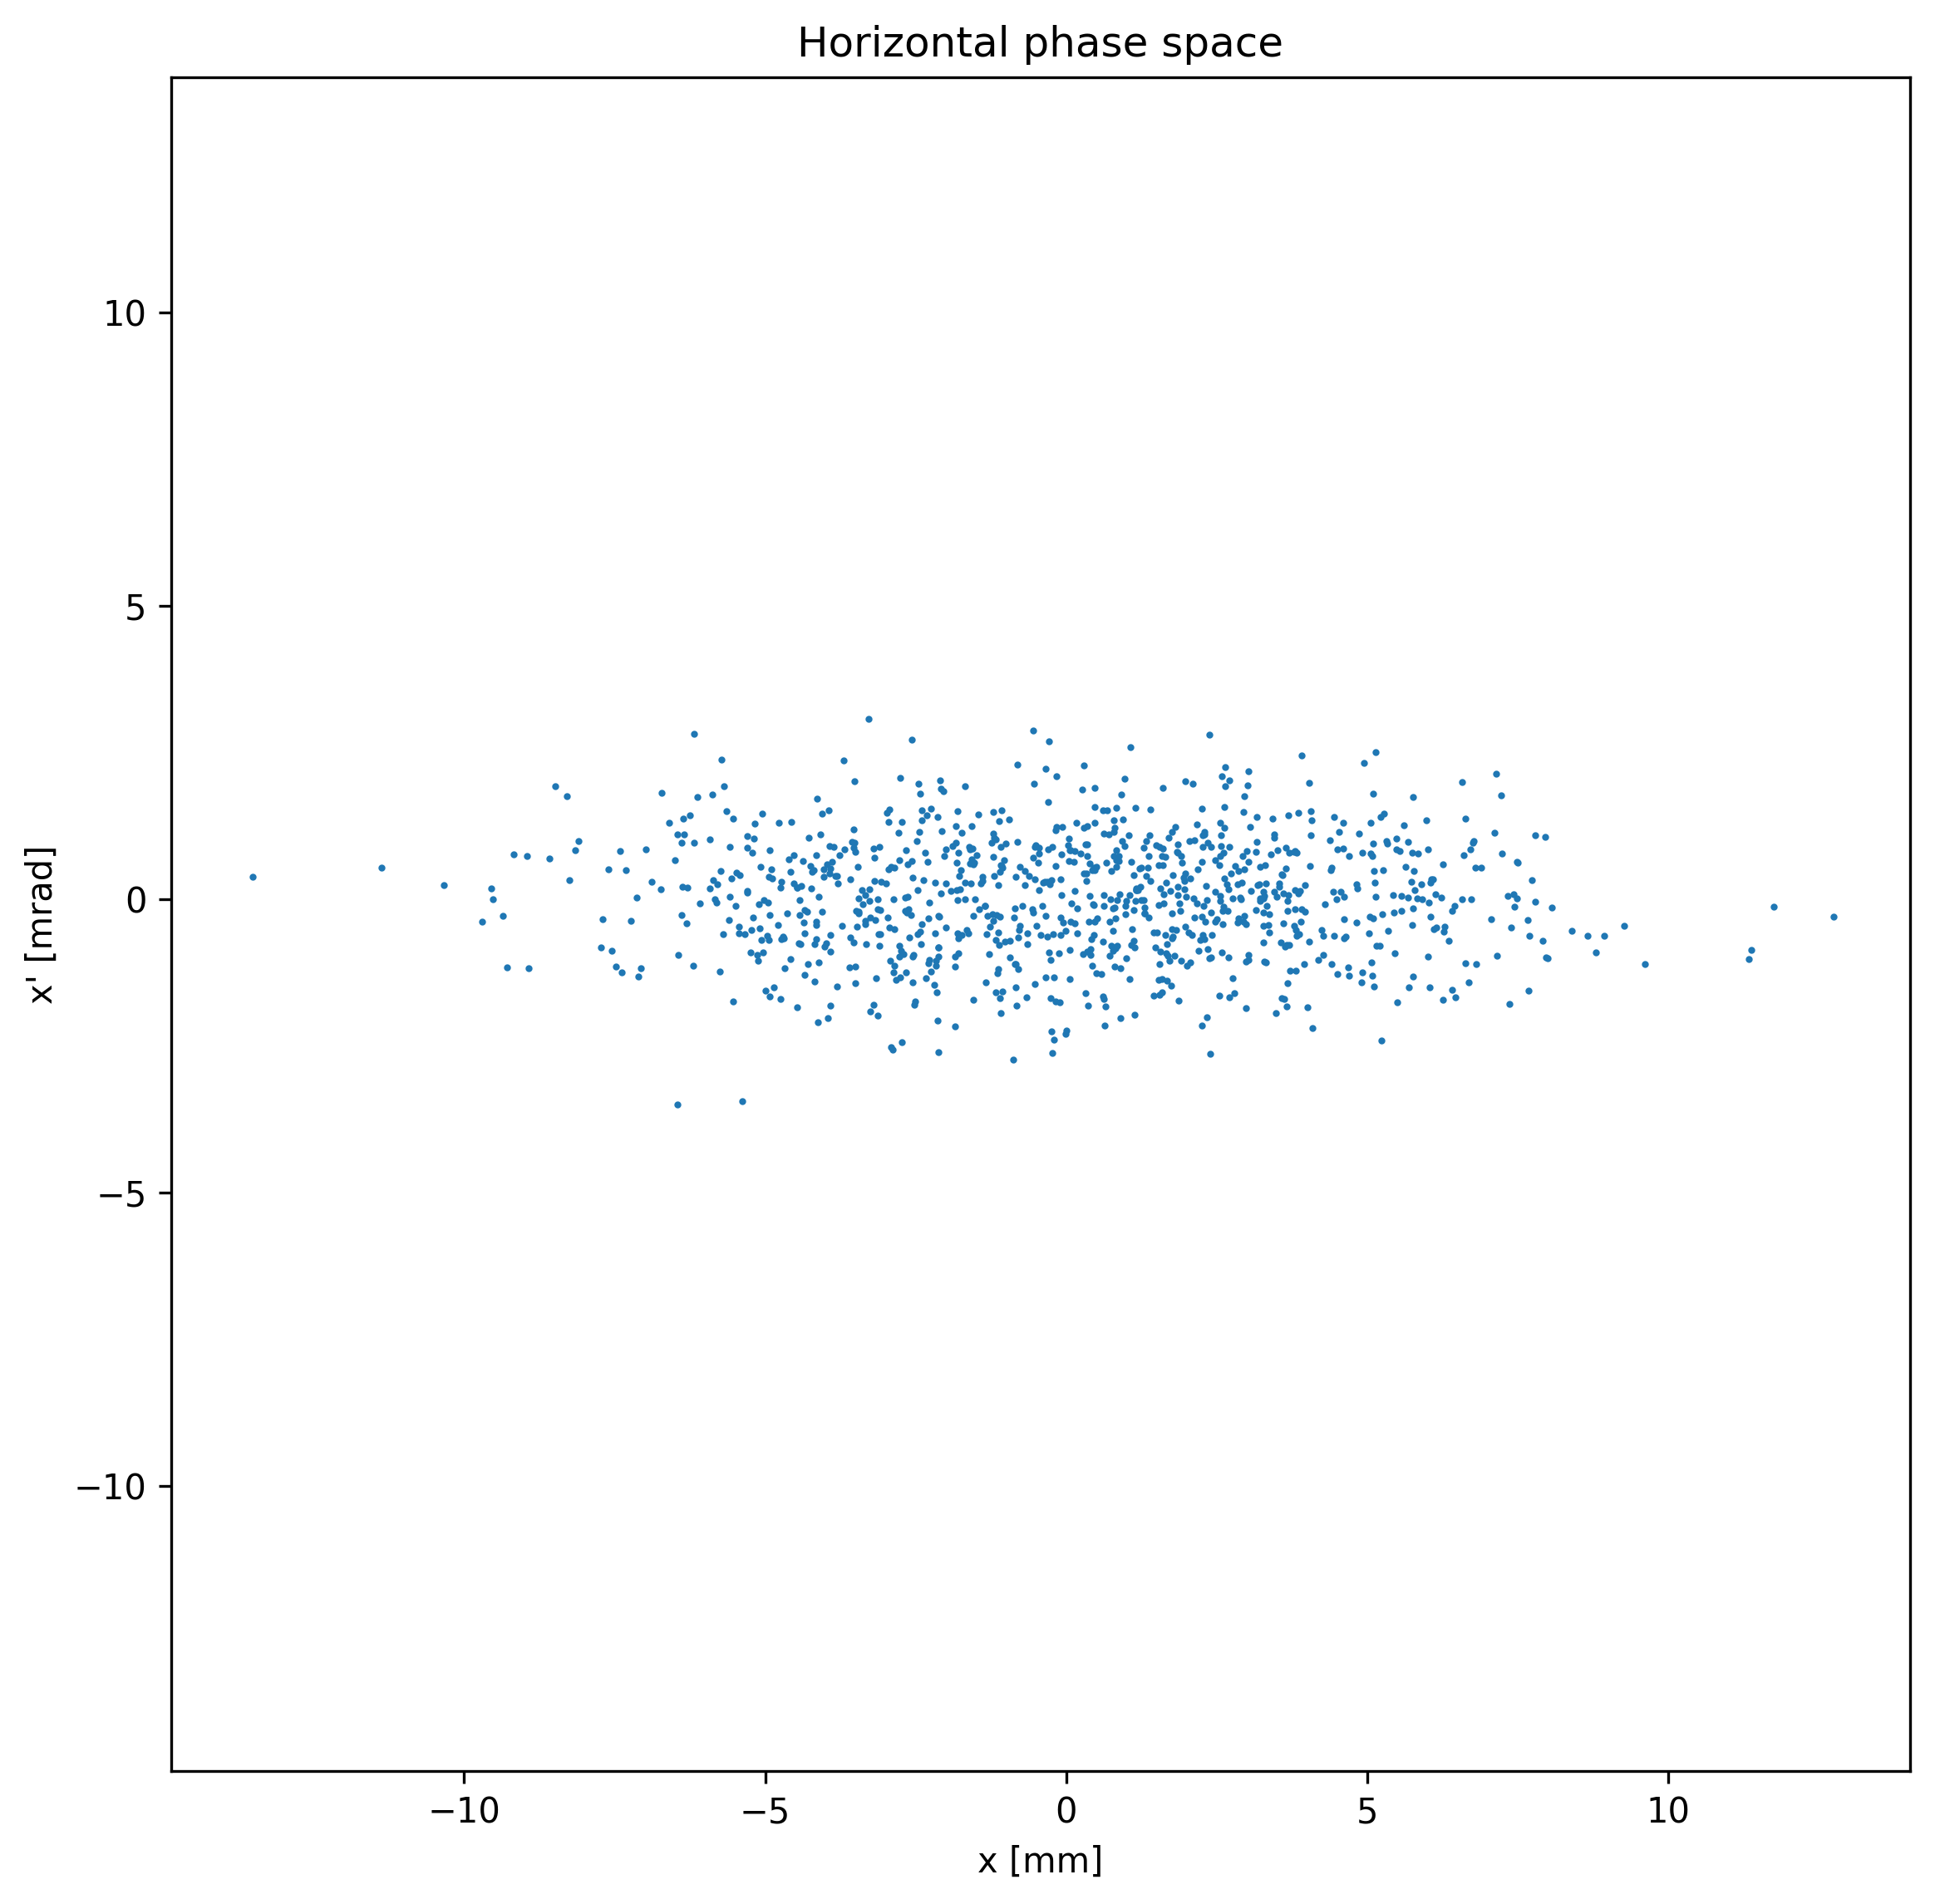

In [9]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Horizontal phase space')

plot_phase_space(ax, bunch['x'], bunch["x'"], "x [mm]", "x' [mrad]")
plt.show()

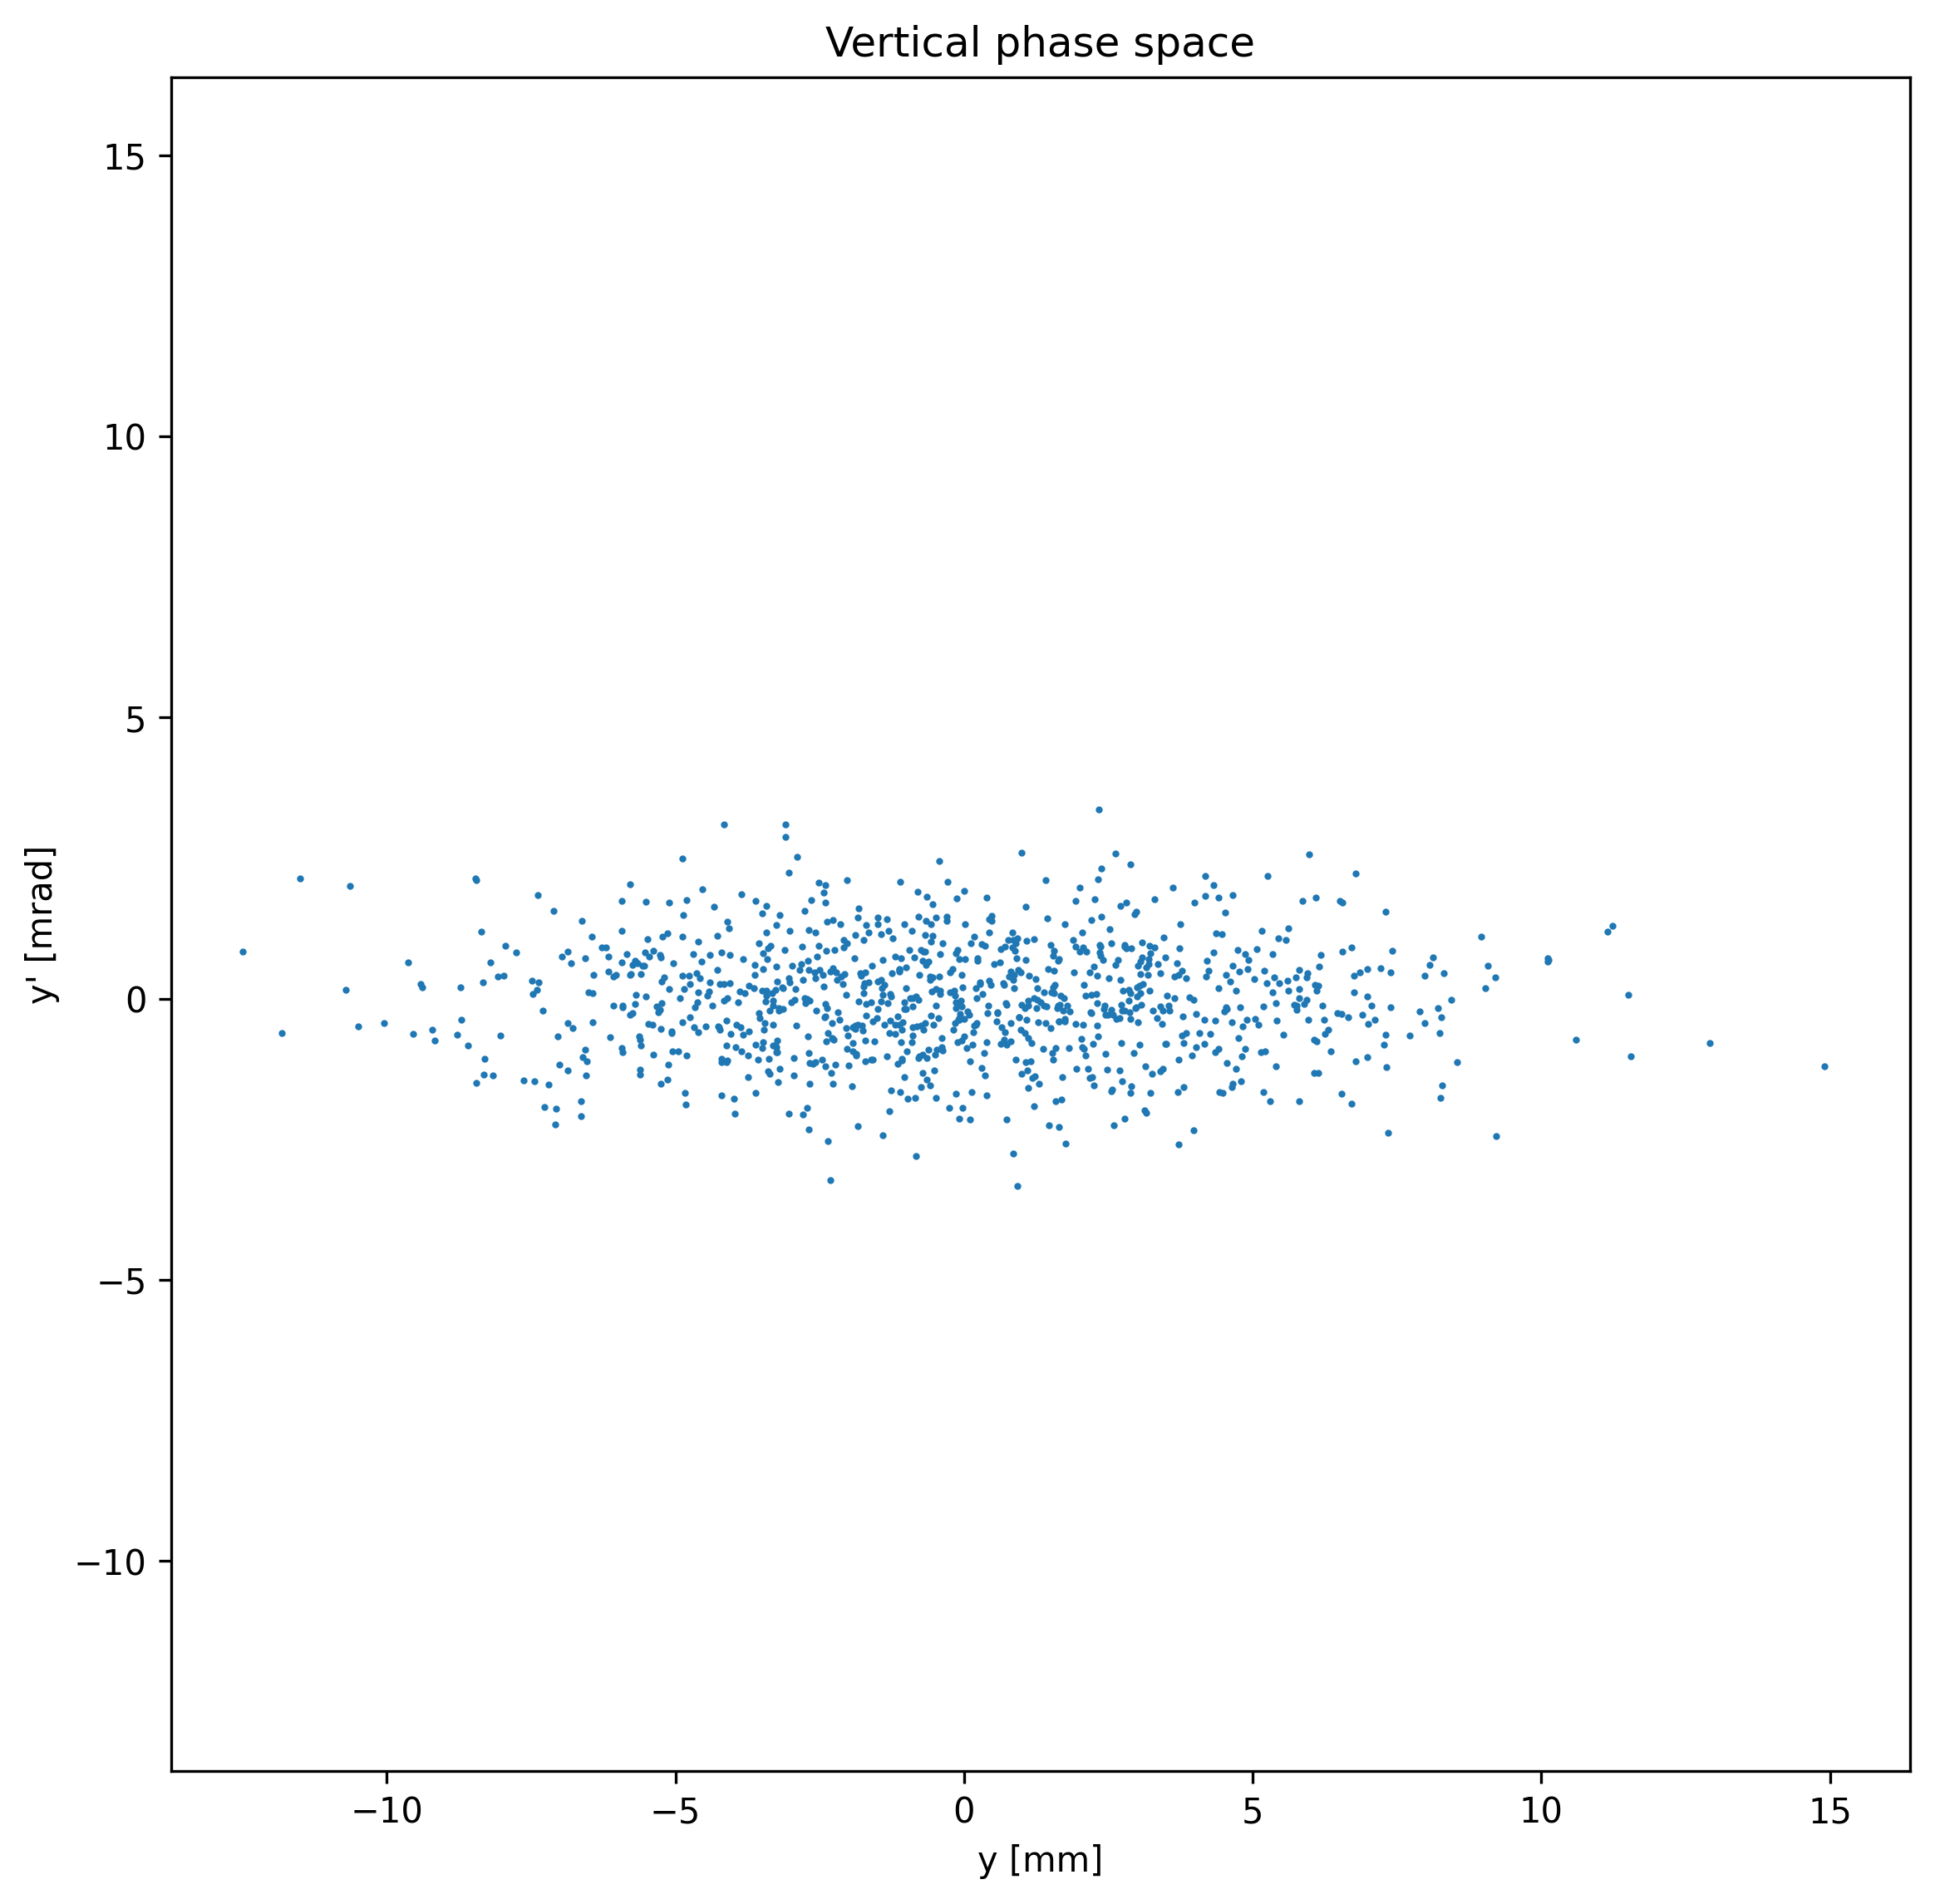

In [10]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Vertical phase space')

plot_phase_space(ax, bunch['y'], bunch["y'"], "y [mm]", "y' [mrad]")
plt.show()

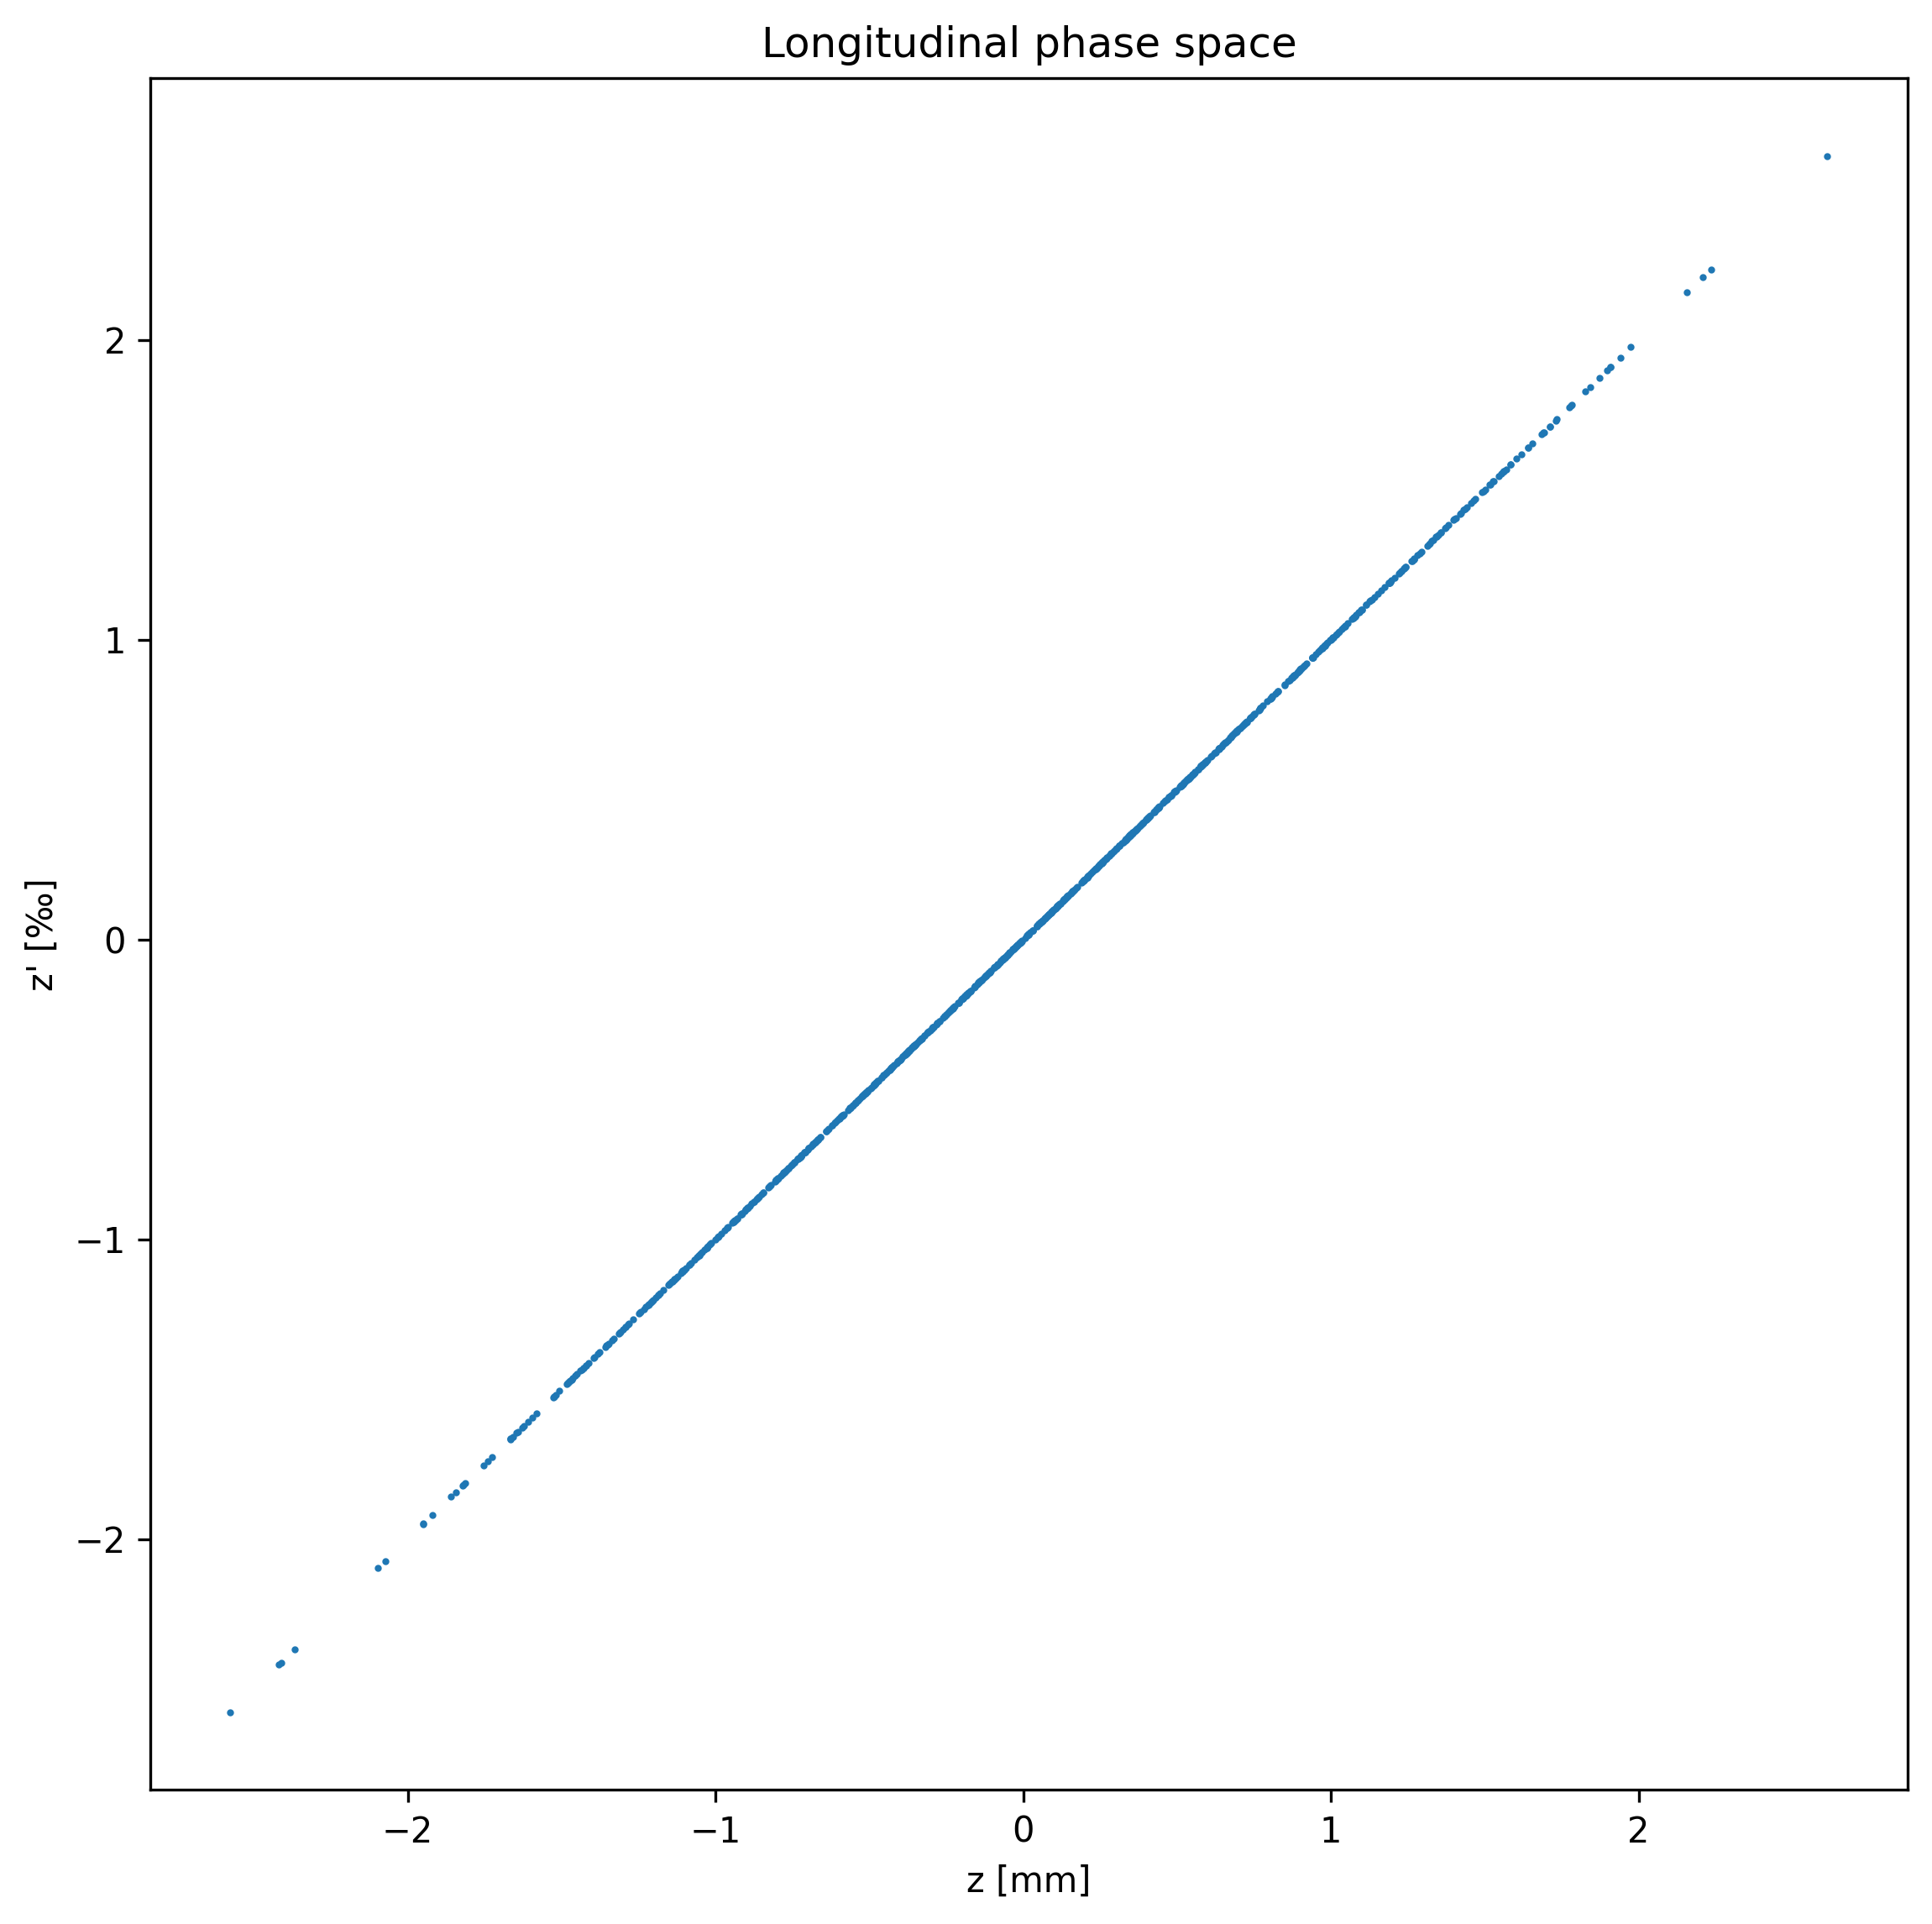

In [11]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Longitudinal phase space')

plot_phase_space(ax, bunch['z'], bunch["z'"], "z [mm]", "z' [\u2030]")
plt.show()